In [2]:
#NOTA: Normalizaste el segundo histogram para la right tail, quiere decir que su area bajo la curva es 1
#Pero no deberia ser asi o si? porque solo quieres parte del PDF, pero porque si quedo igual a la curva exponensial??
#Falta BOOTSTRAP

#Siempre recuerda que cuando corres bloques una y otra vez se tripea por variables, correr todo

%matplotlib inline
from pandas_datareader import data as pdr
import yfinance
import datetime
import matplotlib.pyplot as plt
import numpy as np


start_sp = datetime.datetime(1980, 1, 1)
end_sp = datetime.datetime(2019, 12, 31)
google = pdr.get_data_yahoo('GOOGL', start_sp,end_sp)
    
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659096.0,50.220219
2004-08-20,54.594597,50.300301,50.555557,54.209209,22834343.0,54.209209
2004-08-23,56.796799,54.579578,55.430431,54.754753,18256126.0,54.754753
2004-08-24,55.855858,51.836838,55.675674,52.487488,15247337.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188602.0,53.053055


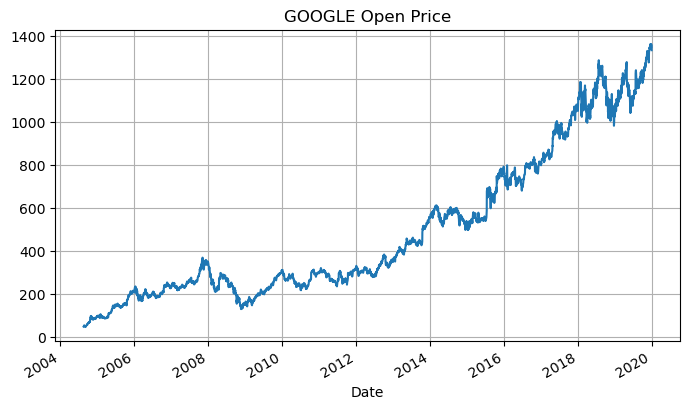

In [9]:
plot0 = plt.figure(0,figsize=(7,4), dpi=100)
google['Open'].plot()
plt.tight_layout()
plt.title('GOOGLE Open Price')
plt.grid()
plt.show()

In [4]:
#N = len(google['Open']) #Esta mejor usar este pero para resultado final no sirvio tan bien
N = 3000 #Checar que esta mejor lo de arriba
returns = np.zeros([N,1])

for i in range(N-1): #Creo que este for loop lo podemos hacer en una linea como m y sd
    #returns[i][0] = (google['Open'][i+1]-google['Open'][i])/google['Open'][i] #Para returns normal
    returns[i][0] = np.log(google['Open'][i+1]/google['Open'][i]) #Para log returns (si cambia levesin)

m = np.sum(returns)/N #Mean

sd = np.sqrt((np.sum((returns-m)**2)/N)) #Standard Deviation

sk = np.sqrt((np.sum((returns-m)**3)/(N*sd**3))) #Skewness

k = np.sqrt((np.sum((returns-m)**4)/(N*sd**4)))-3 #Excess Kurtosis
            
print("mean = ",m)
print("Standard D = ",sd)
print("Skewness = ",sk)
print("Kurtosis = ",k)
            

mean =  0.0009022921234379509
Standard D =  0.020168599637240353
Skewness =  0.7782658071950367
Kurtosis =  0.4314955738996038


0.9999999999999992
[1.]


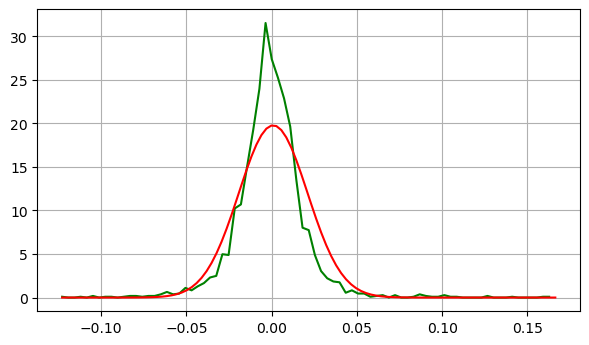

In [5]:
nbins = 80;
h,x = np.histogram(returns,nbins, density = True); #density es para hacerlo PDF pero hay que multiplicar por dx
dx = x[1]-x[0]
print(np.sum(h)*dx) #para comprobar que de uno

#Vamos a plotear la normal distribution para comparar
xn = np.linspace(min(returns),max(returns),100) #valores de x mas o menos vimos que los returns van de -.15 a .15
normal = np.exp(-(xn-m)**2/(2*sd**2))/np.sqrt(2*np.pi*sd**2) #tambien podria ser usando alguna funcion de python
dxn = xn[1]-xn[0]
print(np.sum(normal)*dxn) #para comprobar que de uno

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
plt.plot(x[:-1],h,color ="green") #Acuerdate que el x[:-1] es para quitar ultimo elemento a x
#x es bin edges y tienes uno mas que bins
plt.plot(xn,normal, color = "red")
plt.grid()

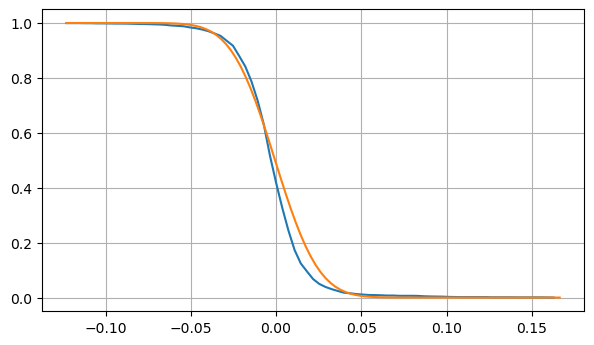

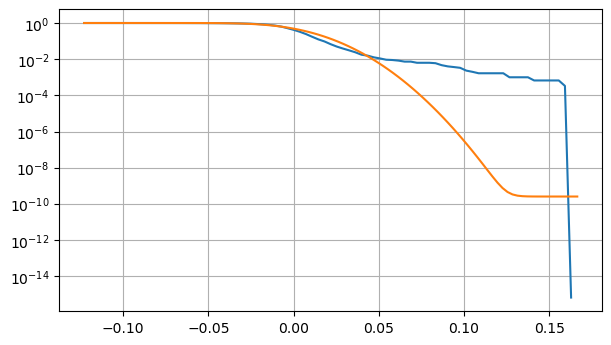

In [6]:
#Normal CDF
normal_CDF = np.zeros([len(normal)]) #solo para tener la longitud
normal_CDF[0] = normal[0]*dxn
for i in range(len(normal)-1):
    normal_CDF[i+1] =  normal_CDF[i] + normal[i+1]*dxn

#CDF returns
sreturns = np.sort(returns, axis = 0) #Sorted returns 
CDF_sreturns = h #solo para hacerlo del mismo tamaño
h = h*dx
CDF_sreturns[0] = h[0]
for k in range(len(h)-1):
    CDF_sreturns[k+1]= CDF_sreturns[k] + h[k+1]

#Plot CDF
plot2 = plt.figure(2,figsize=(7,4), dpi=100)
plt.plot(x[:-1],1-CDF_sreturns) #Plotting the inverse CDF
plt.plot(xn,1-normal_CDF)
plt.grid()

#Plots CDF en semi log scale
plot3 = plt.figure(3,figsize=(7,4), dpi=100)
plt.yscale('log')
plt.plot(x[:-1],1-CDF_sreturns) #Plotting the inverse CDF
plt.plot(xn,1-normal_CDF)
plt.grid()
plt.show()





1.0


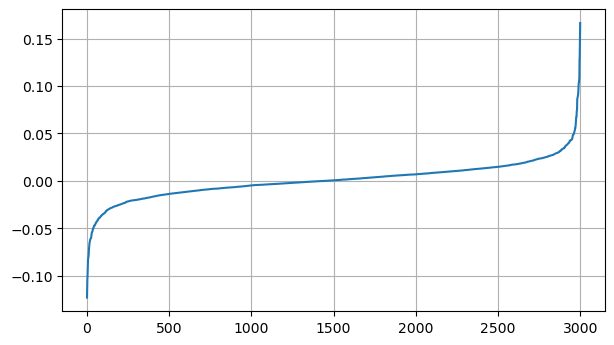

In [7]:
#plot of sorted returns
plot4 = plt.figure(4,figsize=(7,4), dpi=100)
plt.plot(sreturns)
right_tail = sreturns[2400:,:]
plt.grid()

nbins = 40;
h2,x2 = np.histogram(right_tail,nbins,density =True);


dx2 = x2[1]-x2[0]
print(np.sum(h2)*dx2)



alpha =  [1.75293304]


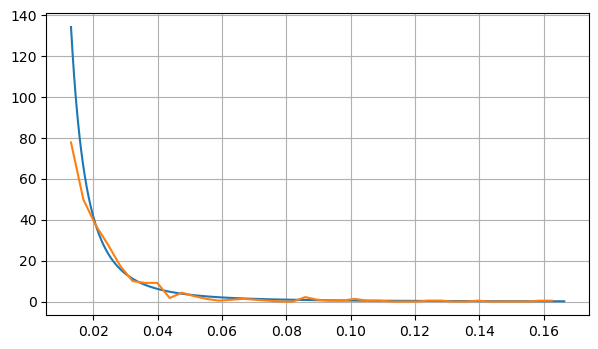

In [8]:
T = N-2400
rmin = right_tail[0]
sum = 0

for j in range(T):
    sum = sum + np.log((right_tail[j]/rmin))
alpha = T/sum
print("alpha = ",alpha)

f = (alpha/rmin)*((right_tail/rmin)**(-(alpha+1)))


plot5 = plt.figure(5,figsize=(7,4), dpi=100)
plt.plot(right_tail,f)
plt.plot(x2[:-1],h2)
plt.grid()



    